--------------------Decomposition of Lucky Peak Discharge--------------------


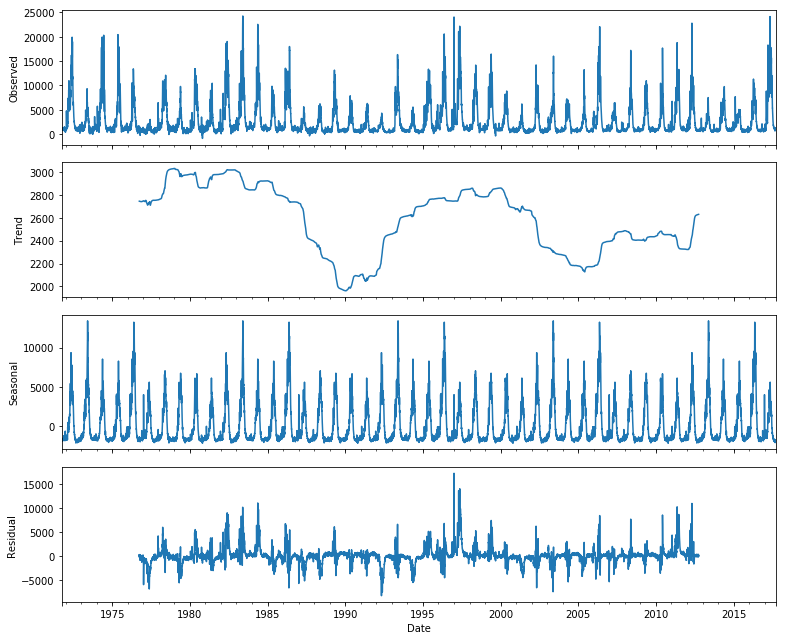

--------------------Decomposition of Parma Discharge--------------------


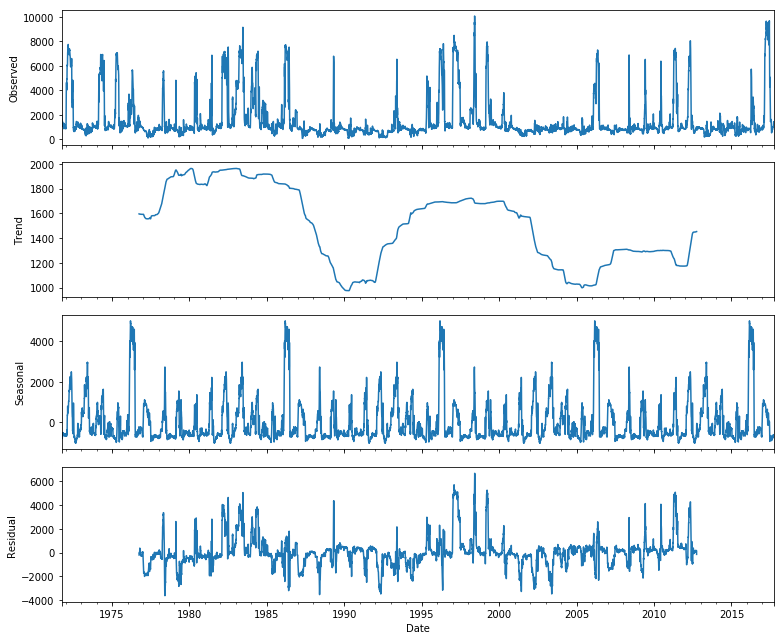

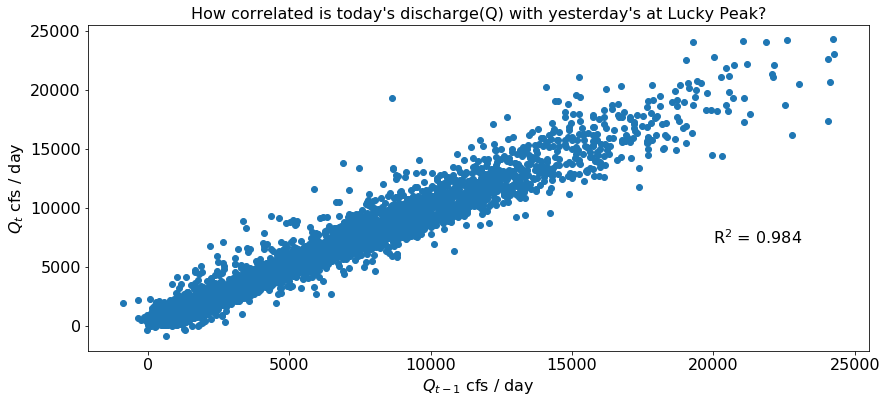

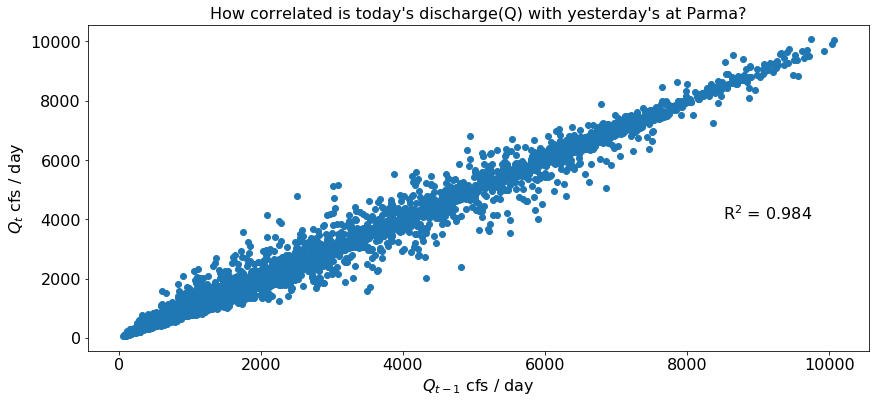

Results of Dickey-Fuller Test for Lucky Peak Discharge:
Test Statistic                -1.257271e+01
p-value                        1.987961e-23
#Lags Used                     4.300000e+01
Number of Observations Used    1.675800e+04
Critical Value (1%)           -3.430740e+00
Critical Value (5%)           -2.861712e+00
Critical Value (10%)          -2.566862e+00
dtype: float64
Results of Dickey-Fuller Test for Parma Discharge:
Test Statistic                -1.015807e+01
p-value                        7.635790e-18
#Lags Used                     3.800000e+01
Number of Observations Used    1.676300e+04
Critical Value (1%)           -3.430740e+00
Critical Value (5%)           -2.861712e+00
Critical Value (10%)          -2.566862e+00
dtype: float64


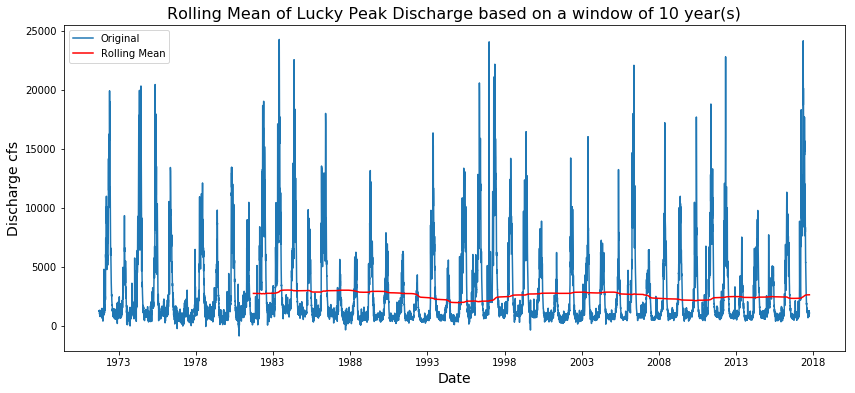

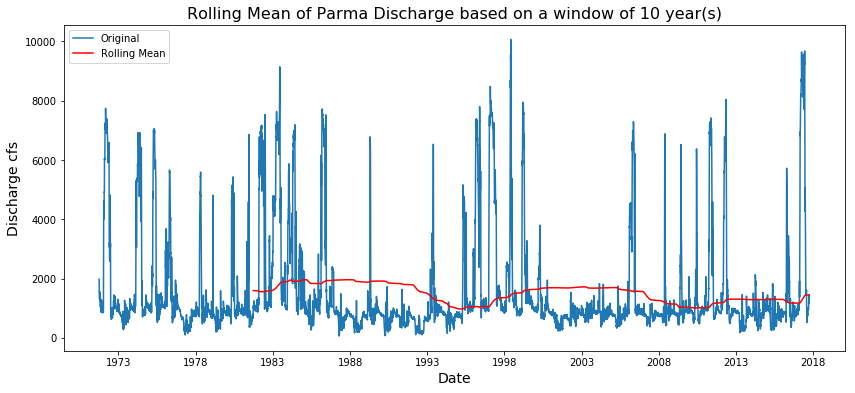

 ------Current window size of 10 Year(s) for following plots------ 


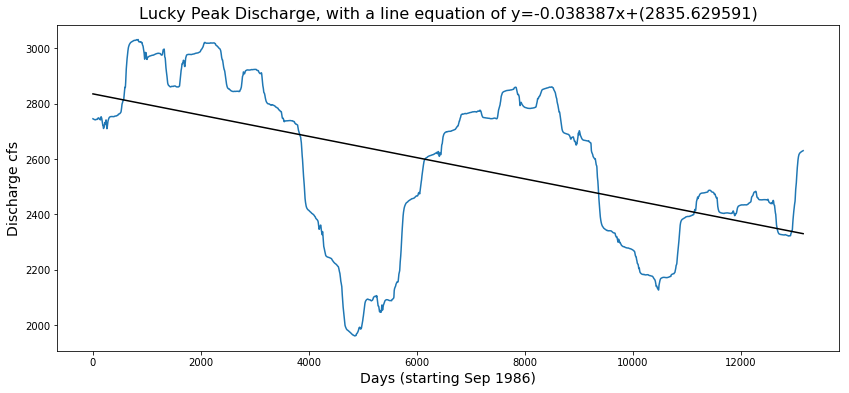

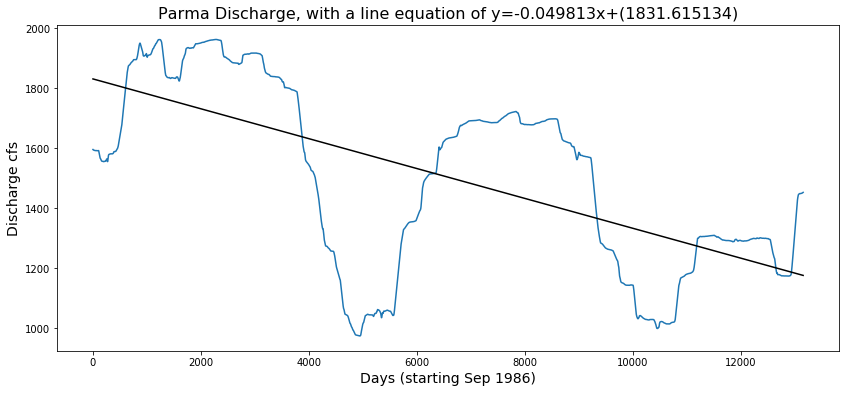

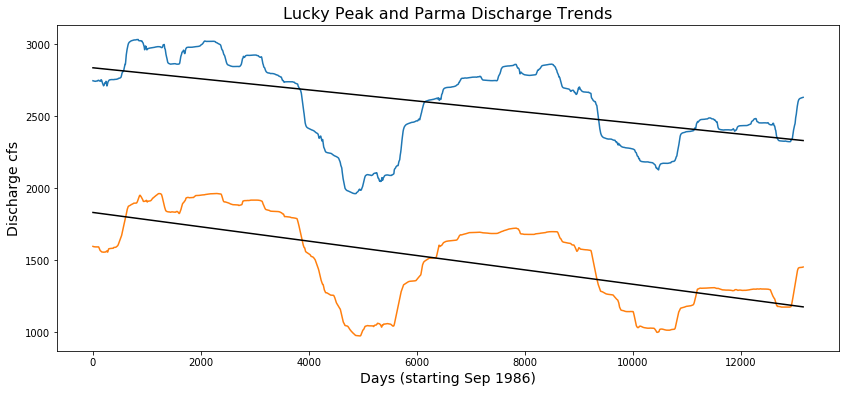

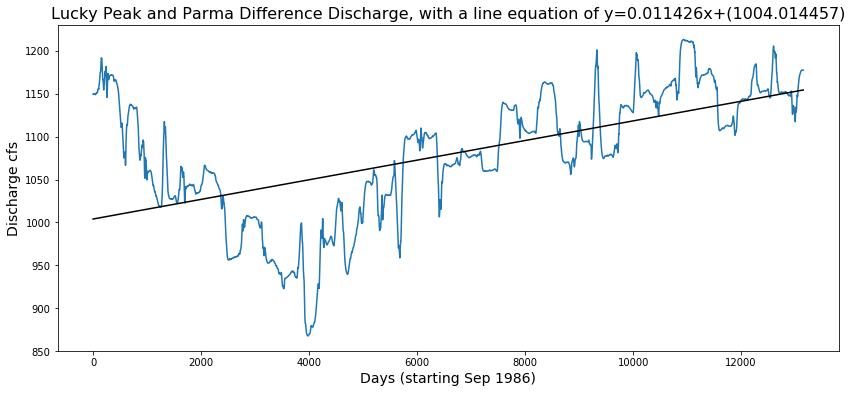

In [4]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import close
from pandas.core import datetools as dt
import statsmodels.tsa.api as sm
from scipy import stats
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# close all open graphics
close("all")

# read in and initialize
df = pd.read_csv('boiseriverDischarge.csv', names=['Dates','Year','Month','Day','Parma','Lucky'], skiprows=1)
parma = df['Parma'].values
lucky = df['Lucky'].values
df['Date'] = pd.to_datetime(df.Year*10000+df.Month*100+df.Day,format='%Y%m%d')
dates = df['Date']
days = df['Date'].dt.day
seriesLucky = pd.Series(lucky,index=dates)
seriesParma = pd.Series(parma,index=dates)


# Year window of interest
N = 10


# Decomposition of the data based on N years
years = N*365
decompositionLucky = sm.seasonal_decompose(seriesLucky, model='additive',freq=years)
decompositionParma = sm.seasonal_decompose(seriesParma, model='additive',freq=years)
# Lucky Peak
# Decomposition
rcParams['figure.figsize'] = 11, 9
print('--------------------Decomposition of Lucky Peak Discharge--------------------')
fig = decompositionLucky.plot()
plt.show()
# Parma
# Decomposition
rcParams['figure.figsize'] = 11, 9
print('--------------------Decomposition of Parma Discharge--------------------')
fig2 = decompositionParma.plot()
plt.show()


# Correlation with previous day
Qt   = lucky[1:-1] 
Qt2  = parma[1:-1]  
Qtm1 = lucky[0:-2]
Qt2m1 = parma[0:-2]
# Lucky Peak
# how correlated is this? 1=max
R = np.corrcoef(Qtm1,Qt)
R[1,0]
# scatter plot
plt.figure(figsize=(14,6))
plt.plot(Qtm1,Qt,'o')
plt.title('How correlated is today\'s discharge(Q) with yesterday\'s at Lucky Peak?',fontsize=16)
plt.xlabel('$Q_{t-1}$ cfs / day',fontsize=16)
plt.ylabel('$Q_t$ cfs / day',fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R[0,1], xy=(20000,7000), fontsize=16)
plt.show()
# Parma
# how correlated is this? 1=max
R2 = np.corrcoef(Qt2m1,Qt2)
R2[1,0]
# scatter plot
plt.figure(figsize=(14,6))
plt.plot(Qt2m1,Qt2,'o')
plt.title('How correlated is today\'s discharge(Q) with yesterday\'s at Parma?',fontsize=16)
plt.xlabel('$Q_{t-1}$ cfs / day',fontsize=16)
plt.ylabel('$Q_t$ cfs / day',fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R[0,1], xy=(8500,4000), fontsize=16)
plt.show()


# Lucky Peak Dickey Fuller test
print ('Results of Dickey-Fuller Test for Lucky Peak Discharge:')
dftest = adfuller(seriesLucky, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)
# Parma Dickey Fuller test
print ('Results of Dickey-Fuller Test for Parma Discharge:')
dftest = adfuller(seriesParma, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)


#variables for moving averages
rolmean_lucky = pd.rolling_mean(seriesLucky, window=years, center=False)
rolstd_lucky = pd.rolling_std(seriesLucky, window=years, center=False)
rolmean_parma = pd.rolling_mean(seriesParma, window=years, center=False)
rolstd_parma = pd.rolling_std(seriesParma, window=years, center=False)
RM_Lucky = pd.rolling_mean(seriesLucky, window=years, center=False).values
RM_Parma = pd.rolling_mean(seriesParma, window=years, center=False).values
# Plot Lucky Peak rolling statistics:
plt.figure(figsize=(14,6))
orig = plt.plot(seriesLucky,label='Original')
mean = plt.plot(rolmean_lucky, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean of Lucky Peak Discharge based on a window of %i year(s)'%N,fontsize=16)
plt.ylabel('Discharge cfs',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.show()
# Plot Parma rolling statistics:
plt.figure(figsize=(14,6))
orig = plt.plot(seriesParma,label='Original')
mean = plt.plot(rolmean_parma, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean of Parma Discharge based on a window of %i year(s)'%N,fontsize=16)
plt.ylabel('Discharge cfs',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.show()


# Plots for data and trends
# Create new dataframe and trim NaN values from the data
df2 = pd.DataFrame({'Date': dates, 'RM_lucky': RM_Lucky, 'RM_Parma': RM_Parma})
filtered_df2 = df2[df2['RM_lucky'].notnull()]
RM_Lucky_f = filtered_df2['RM_lucky'].values
RM_Parma_f = filtered_df2['RM_Parma'].values
date_f = filtered_df2['Date'].values.astype('datetime64[D]')
# Calculate the difference per year between the datasets
# Difference
difference = []
for i in range(len(RM_Lucky_f)):
    x = RM_Lucky_f[i] - RM_Parma_f[i]
    difference.append(x)
# print window size for plot data
print('\033[1m ------Current window size of %i Year(s) for following plots------ \033[1m'%N)
# trendline psuedo x vector    
daterange = np.arange(0,len(difference),1)
# Plot lucky peak
# lucky peak trendline
z = np.polyfit(daterange, RM_Lucky_f, 1)
p = np.poly1d(z)
plt.figure(figsize=(14,6))
plt.plot(daterange,RM_Lucky_f)
plt.plot(daterange,p(daterange),color="black")
plt.title('Lucky Peak Discharge, with a line equation of y=%.6fx+(%.6f)'%(z[0],z[1]),fontsize=16)
plt.ylabel('Discharge cfs',fontsize=14)
plt.xlabel('Days (starting Sep 1986)',fontsize=14)
#print ("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.show()
# Plot parma
# Parma trendline
z = np.polyfit(daterange, RM_Parma_f, 1)
p = np.poly1d(z)
plt.figure(figsize=(14,6))
plt.plot(daterange,RM_Parma_f)
plt.plot(daterange,p(daterange),color="black")
plt.title('Parma Discharge, with a line equation of y=%.6fx+(%.6f)'%(z[0],z[1]),fontsize=16)
plt.ylabel('Discharge cfs',fontsize=14)
plt.xlabel('Days (starting Sep 1986)',fontsize=14)
#print ("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.show()
# Plot of both Lucky peak and Parma
# lucky peak trendline
zl = np.polyfit(daterange, RM_Lucky_f, 1)
pl = np.poly1d(zl)
# Parma trendline
zp = np.polyfit(daterange, RM_Parma_f, 1)
pp = np.poly1d(zp)
# Plot\
plt.figure(figsize=(14,6))
plt.plot(daterange,RM_Lucky_f)
plt.plot(daterange,pl(daterange),color="black")
plt.plot(daterange,RM_Parma_f)
plt.plot(daterange,pp(daterange),color="black")
plt.xlabel('Days (starting Sep 1986)',fontsize=14)
plt.title('Lucky Peak and Parma Discharge Trends', fontsize=16)
plt.ylabel('Discharge cfs',fontsize=14)
plt.show()
# Plot difference of both moving averages
# difference trendline
z = np.polyfit(daterange, difference, 1)
p = np.poly1d(z)
plt.figure(figsize=(14,6))
plt.plot(daterange,difference)
plt.plot(daterange,p(daterange),color="black")
plt.title('Lucky Peak and Parma Difference Discharge, with a line equation of y=%.6fx+(%.6f)'%(z[0],z[1]),fontsize=16)
plt.ylabel('Discharge cfs',fontsize=14)
plt.xlabel('Days (starting Sep 1986)',fontsize=14)
#print ("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.show()